# Build LSTM model
- As LSTM is a special case of RNN, which resolves the Vanishing Gradient problem by retaining the 
information in memory

LSRM Structure-
                
                1-Forget Gate

                2-input Gate

                3-Output Gate

# Types of Sequence based Models

              1-Sequence Generation

              2-Sequence Classification

              3-Sequence prediction


### Fake-Job-Posting-Prediction i will uesd Sequence Classification and also use bidirectional LSTM 




# Bidirectional LSTM -

A Bidirectional LSTM, or biLSTM, is a sequence processing model that consists of two LSTMs: one taking the input in a forward direction, and the other in a backwards direction.


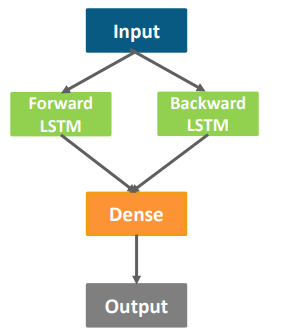

##Import library 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from sklearn.feature_extraction.text import CountVectorizer

###Import Text preprocessing files

In [ ]:
df=pd.read_csv("Data.csv")
df

,job_id,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
0,1,0,0,1,0,Other,Internship,NaN,Marketing,0,marketing intern were food weve created ground...
1,2,0,0,1,0,Full-time,Not Applicable,NaN,Customer Service,0,customer service cloud video production second...
2,3,0,0,1,0,NaN,NaN,NaN,NaN,0,commissioning machinery assistant cma valor se...
3,4,0,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Sales,0,account executive washington dc passion improv...
4,5,0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Health Care Provider,0,bill review manager spotsource solution llc gl...
...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,0,0,1,1,Full-time,Mid-Senior level,NaN,Sales,0,account director distribution vend looking awe...
17876,17877,0,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Accounting/Auditing,0,payroll accountant weblinc ecommerce platform ...
17877,17878,0,0,0,0,Full-time,NaN,NaN,NaN,0,project cost control staff engineer cost contr...
17878,17879,0,0,0,1,Contract,Not Applicable,Professional,Design,0,graphic designer nemsia studio looking experie...


In [ ]:
df['text'][0]

'marketing intern were food weve created groundbreaking awardwinning cooking site support connect celebrate home cook give everything need one place we top editorial business engineering team were focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish wellknown professional like mario batali gwyneth paltrow danny meyer partnership whole food market random house food named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today show were located chelsea new york city food fastgrowing james beard awardwinning online food community crowdsourced curated recipe hub currently interviewing full parttime unpaid intern work small team editor executive developer new york city headquarters reproducing and or repackaging existing food content number partner site huffington post yahoo buzzfeed various conten

## Create a new Dataframe only for as df1 they have only text data ⏰ 

In [ ]:
df1 = pd.DataFrame()
df1['text'] = df.text
df1['freu'] = df.fraudulent

In [ ]:
df1.head()

,text,freu
0,marketing intern were food weve created ground...,0
1,customer service cloud video production second...,0
2,commissioning machinery assistant cma valor se...,0
3,account executive washington dc passion improv...,0
4,bill review manager spotsource solution llc gl...,0


#Find the length of all text

In [ ]:
df1['word count'] = [len(i.split(' ')) for i in df1['text']]

In [ ]:
df1.head()

,text,freu,word count
0,marketing intern were food weve created ground...,0,252
1,customer service cloud video production second...,0,533
2,commissioning machinery assistant cma valor se...,0,236
3,account executive washington dc passion improv...,0,493
4,bill review manager spotsource solution llc gl...,0,358


In [ ]:
sent_length = df1['word count'].max()

##Bag of Words

### Nlp library

In [ ]:
max_features = 10000

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import explained_variance_score

#Tenserflow Library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding,  Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

In [ ]:
t = Tokenizer(num_words = max_features)
# fit the tokenizer on the documents
t.fit_on_texts(df1['text'])

In [ ]:
encoded_docs = t.texts_to_sequences(df1['text'])

In [ ]:
import joblib
joblib.dump(t, './tokinezer_file')

['./tokinezer_file']

## Embedding Representation

In [ ]:
embedded_docs=pad_sequences(encoded_docs,padding='pre',maxlen=sent_length)
print(embedded_docs)# all reviews must be same lenght. we equals all reviews lenght

[[   0    0    0 ...   19  292  127]
 [   0    0    0 ...  217 6695   40]
 [   0    0    0 ... 2086   21 1544]
 ...
 [   0    0    0 ...  395  453  570]
 [   0    0    0 ...   28  147  447]
 [   0    0    0 ...  316   20   67]]


## Determine Dependent and Independent Variables for sppliting the Data

In [ ]:
y = df.fraudulent.values
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y = y.reshape(-1,1)
y.shape

(17880, 1)

In [ ]:
X = np.array(embedded_docs)
X.shape

(17880, 1444)

##**Train and test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 101)

In [ ]:
print("X_train shape: ",X_train.shape)
print("X_test shape : ",X_test.shape )
print("y_train shape: ",y_train.shape)
print("y_test shape : ",y_test.shape)

X_train shape:  (16092, 1444)
X_test shape :  (1788, 1444)
y_train shape:  (16092, 1)
y_test shape :  (1788, 1)


In [ ]:
def eval_metrics(actual, prediction):
    print("Accuracy Score: {}".format(accuracy_score(actual, prediction)))
    print("Recall Score: {}".format(recall_score(actual, prediction)))
    print("f1 Score: {}".format(f1_score(actual, prediction)))

 ## Modeling with Deep Learning

 ### Bidirectional LSTM

In [ ]:
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(max_features,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(20 )))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1444, 40)          400000    
                                                                 
 bidirectional (Bidirectiona  (None, 40)               9760      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 41        
                                                                 
Total params: 409,801
Trainable params: 409,801
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

cp = ModelCheckpoint("./bidirectional_model/" ,save_best_only = True)## creaitng model checkpoint
hist = model1.fit(X_train, y_train, epochs = 5, batch_size = 64,  callbacks = cp, validation_data=(X_test,y_test))

Epoch 1/5
252/252 [==============================] - ETA: 0s - loss: 0.1944 - accuracy: 0.9529

252/252 [==============================] - 43s 130ms/step - loss: 0.1944 - accuracy: 0.9529 - val_loss: 0.1073 - val_accuracy: 0.9698
Epoch 2/5
252/252 [==============================] - ETA: 0s - loss: 0.0754 - accuracy: 0.9781

252/252 [==============================] - 33s 129ms/step - loss: 0.0754 - accuracy: 0.9781 - val_loss: 0.0891 - val_accuracy: 0.9787
Epoch 3/5
252/252 [==============================] - ETA: 0s - loss: 0.0411 - accuracy: 0.9892

252/252 [==============================] - 33s 129ms/step - loss: 0.0411 - accuracy: 0.9892 - val_loss: 0.0792 - val_accuracy: 0.9782
Epoch 4/5
252/252 [==============================] - 21s 81ms/step - loss: 0.0263 - accuracy: 0.9936 - val_loss: 0.0883 - val_accuracy: 0.9771
Epoch 5/5
252/252 [==============================] - 20s 81ms/step - loss: 0.0178 - accuracy: 0.9954 - val_loss: 0.0882 - val_accuracy: 0.9827


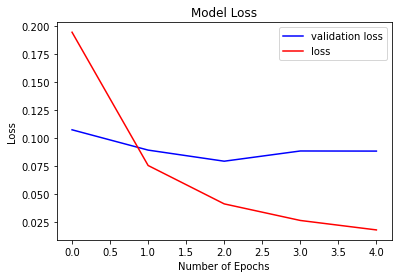

In [ ]:
plt.plot(hist.history['val_loss'], color='b', label="validation loss")
plt.plot(hist.history['loss'], color='red', label="loss")
plt.title("Model Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

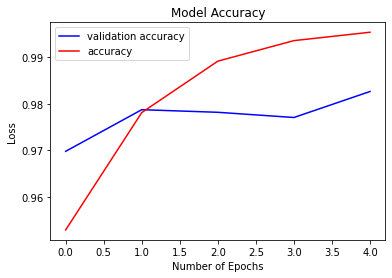

In [ ]:
plt.plot(hist.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(hist.history['accuracy'], color='red', label="accuracy")
plt.title("Model Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model("./bidirectional_model/")

In [ ]:
y_pred = model1.predict(X_test)
y_pred

array([[0.00358336],
       [0.00464353],
       [0.00233479],
       ...,
       [0.00891414],
       [0.00911843],
       [0.00899927]], dtype=float32)

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
y_train_pred = model1.predict(X_train)

In [ ]:
y_train_pred = (y_train_pred > 0.5)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1689   15]
 [  24   60]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1704
           1       0.80      0.71      0.75        84

    accuracy                           0.98      1788
   macro avg       0.89      0.85      0.87      1788
weighted avg       0.98      0.98      0.98      1788



In [ ]:
eval_metrics(y_test, y_pred)

Accuracy Score: 0.9781879194630873
Recall Score: 0.7142857142857143
f1 Score: 0.7547169811320756


In [ ]:
eval_metrics(y_train, y_train_pred)

Accuracy Score: 0.9937235893611732
Recall Score: 0.9475703324808185
f1 Score: 0.936197094125079


## Accuracy Score

Accuracy Score: 0.9937235893611732

Recall Score: 0.9475703324808185

f1 Score: 0.936197094125079

##**Observation:**

1-Increase the Accuracy Chanage the Optimizer likes(RMSprop, adam, LeckyRelu and Using GRU)

2-Increase the epoch

3-Increase the layers


references : 

-[link text](https://)https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction

-https://www.kaggle.com/code/mesutbilgin/real-fake-job-posting-prediciton-bidirtnl-lstm

>**🤗**